In [ ]:
import pandas as pd
import os
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [246]:
names_real = ["soccer", "manufacturing", "intel_lab"]
names_real_exp = ["soccer_exp", "manufacturing_exp", "intel_lab_exp"]
width = 1000
height = 600

In [247]:
data = "../more-vis-index/output/timeQueries/postgres/"
results = "results.csv"

sql_folder = "sqlResults"
tti_folder = "ttiResults"
names = names_real_exp

In [248]:
results_paths = [os.path.join(data, name, results) for name in names]
results_paths

['../more-vis-index/output/timeQueries/postgres/soccer_exp/results.csv',
 '../more-vis-index/output/timeQueries/postgres/manufacturing_exp/results.csv',
 '../more-vis-index/output/timeQueries/postgres/intel_lab_exp/results.csv']

In [249]:
dfs = [pd.read_csv(results_path) for results_path in results_paths]

EmptyDataError: No columns to parse from file

In [240]:
def plot_time(df, name):
    plt.clf()

    fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})
    fig.suptitle(f"Time and average time in {name} dataset")
    ax1.plot(df["TTI Time (sec)"], label= "VS Cache")
    ax1.plot(df["RAW TTI Time (sec)"], label="RAW Cache")
    ax1.plot(df["PostgreSQL Time (sec)"], label="PostgreSQL")
    
    ax2.bar(0, df["TTI Time (sec)"].mean())
    ax2.bar(1, df["RAW TTI Time (sec)"].mean())
    ax2.bar(2, df["PostgreSQL Time (sec)"].mean())
    ax2.set_xticklabels([])
    fig.legend(loc=2, bbox_to_anchor=(0.9, 0.6))
    plt.show()


def plot_memory(df, name):
    plt.clf()
    fig, (ax1, ax2) = plt.subplots(1, 2,  gridspec_kw={'width_ratios': [3, 1]})
    fig.suptitle(f"Memory and average memory in {name} dataset")
    ax1.plot(df["TTI Memory (b)"], label= "VS Cache")
    ax1.plot(df["Raw TTI Memory (b)"], label="RAW Cache")
    
    ax2.bar(0, df["TTI Memory (b)"].mean())
    ax2.bar(1, df["Raw TTI Memory (b)"].mean())
    ax2.set_xticklabels([])
    fig.legend(loc=2, bbox_to_anchor=(0.9, 0.6))
    plt.show()
    
def plot_compaction(df, name):
    plt.clf()
    fig, (ax1, ax2) = plt.subplots(1, 2,  gridspec_kw={'width_ratios': [3, 1]})
    df["TTI compaction"] = df["TTI results size"]/df["RAW TTI results size"]
    df["PostgreSQL compaction"] = df["PostgreSQL results size"]/df["RAW TTI results size"]

    fig.suptitle(f"Data Compaction in {name} dataset")
    ax1.plot(df["TTI compaction"], label= "VS Cache")
    ax1.plot(df["PostgreSQL compaction"], label="PostgreSQL")
    
    ax2.bar(0, df["TTI compaction"].mean())
    ax2.bar(1, df["PostgreSQL compaction"].mean())
    ax2.set_xticklabels([])
    fig.legend(loc=2, bbox_to_anchor=(0.9, 0.6))
    plt.show()
    
def plot_time_per_operation(df, name):
    plt.clf()
    width = 0.3
    tti = (df[["operation", "TTI Time (sec)"]].groupby("operation").aggregate('mean'))
    raw = (df[["operation", "RAW TTI Time (sec)"]].groupby("operation").aggregate('mean'))
    psql = (df[["operation", "PostgreSQL Time (sec)"]].groupby("operation").aggregate('mean'))
    r = np.arange(3)
    fig, (ax1) = plt.subplots(1, 1)
    fig.suptitle(f"Average time per operation in {name} dataset")
    ax1.bar(r, tti['TTI Time (sec)'], width=width, label="VS Cache")
    ax1.bar(r + width, raw['RAW TTI Time (sec)'],  width=width, label= "RAW Cache")
    ax1.bar(r + 2*width, psql['PostgreSQL Time (sec)'], width=width,  label = "PostgreSQL")
    ax1.legend()
    ax1.set_xticks(r + width, ['PAN', 'ZI', 'ZO'])

    plt.show()

<Figure size 640x480 with 0 Axes>

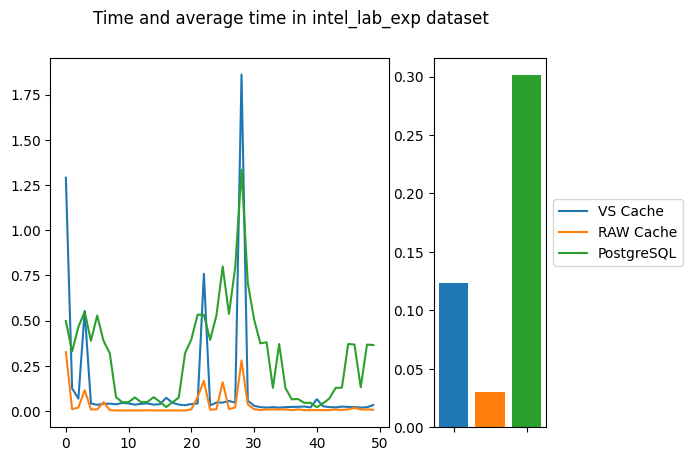

In [241]:
i = 0
for df in dfs:
    plot_time(df, names[i])
    i += 1

<Figure size 640x480 with 0 Axes>

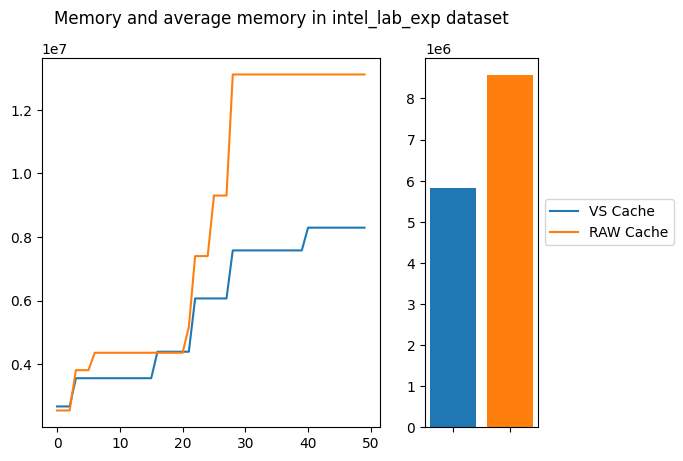

In [242]:
i = 0
for df in dfs:
    plot_memory(df, names[i])
    i += 1

<Figure size 640x480 with 0 Axes>

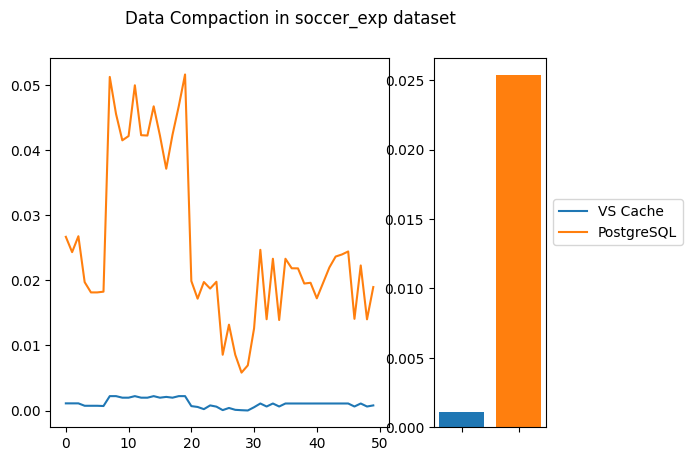

<Figure size 640x480 with 0 Axes>

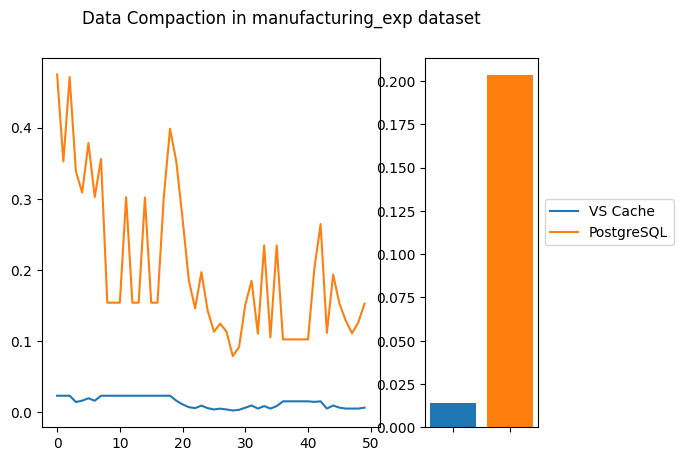

<Figure size 640x480 with 0 Axes>

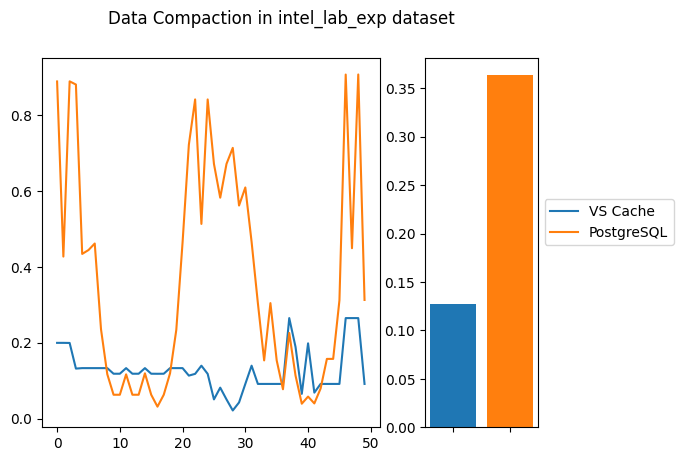

In [217]:
i = 0
for df in dfs:
    plot_compaction(df, names[i])
    i += 1

<Figure size 640x480 with 0 Axes>

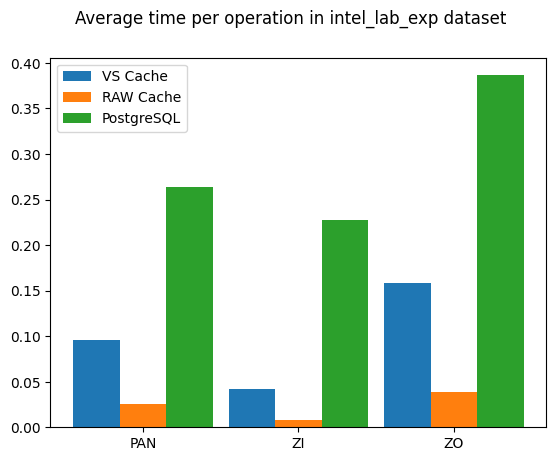

In [243]:
i = 0
for df in dfs:
    plot_time_per_operation(df, names[i])
    i += 1

In [244]:
from skimage import io, color
from skimage.metrics import structural_similarity as compare_ssim

def plot(df, measure, name):
    my_dpi = 100
    plt.figure(figsize=(width / my_dpi, height/ my_dpi), dpi=my_dpi)
    plt.plot(df['timestamp'], df[measure])
    plt.axis('off')
    plt.savefig(name, bbox_inches='tight', dpi=my_dpi)
    plt.close()
    
    
def calculate_ssim(image_file1, image_file2):
    # Read the two images
    image1 = io.imread(image_file1)
    image2 = io.imread(image_file2)

    # Remove the alpha channel if present
    if image1.shape[2] == 4:
        image1 = image1[:, :, :3]
    if image2.shape[2] == 4:
        image2 = image2[:, :, :3]

    image1_gray = color.rgb2gray(image1)
    image2_gray = color.rgb2gray(image2)

    ssim_index = compare_ssim(image1_gray, image2_gray, data_range=1)
    # print(f"SSIM between {image_file1} and {image_file2}: {ssim_index:.4f}")

    return ssim_index

def plot_indexes(df, name):
    tti_results_path = os.path.join(data, name, tti_folder)
    sql_results_path = os.path.join(data, name, sql_folder)
    
    tti_query_0 = os.path.join(tti_results_path, "query_0")
    sql_query_0 = os.path.join(sql_results_path, "query_0")
    
    meassure_files = os.listdir(tti_query_0)
    measures = [x.replace(".csv", "") for x in meassure_files]
    plt.clf()
    queries = os.listdir(tti_results_path)
    all_ssim = [] 
    for q in queries:
        j = 0
        ssim = 0
        for m in meassure_files:
            path_tti = os.path.join(tti_results_path, q)
            path_sql = os.path.join(sql_results_path, q)
            df_tti = pd.read_csv(os.path.join(path_tti, m))
            df_raw = pd.read_csv(os.path.join(path_sql, m)) 
            plot(df_tti, measures[j], f"tti")
            plot(df_raw, measures[j], f"raw")
            ssim += (calculate_ssim("tti.png", "raw.png"))
            os.remove("tti.png")
            os.remove("raw.png")
            j+=1  
        avg_ssim = ssim / len(measures)
        all_ssim.append(avg_ssim)
    
    fig, (ax1, ax2) = plt.subplots(1, 2,  gridspec_kw={'width_ratios': [3, 1]})

    fig.suptitle(f"SSIM in {name} dataset")
    ax1.plot(all_ssim)
    
    ax2.bar(0, np.mean(all_ssim))
    ax2.set_xticklabels([])
    fig.legend(loc=2, bbox_to_anchor=(0.9, 0.6))
    plt.show()    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

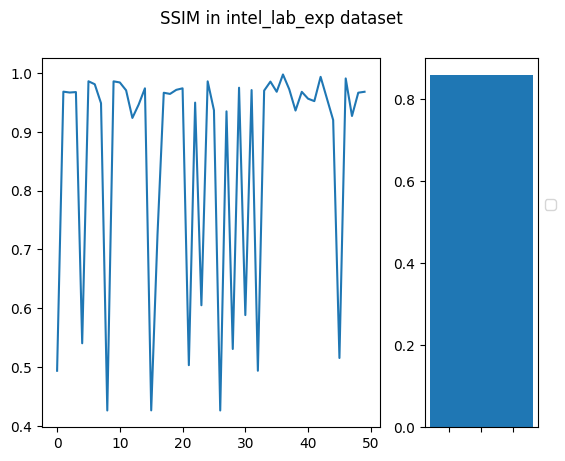

In [245]:
i = 0
all_ssim = []
for df in dfs:
    plot_indexes(df, names[i])
    i+=1